In [18]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from src import MO_DQN
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd

In [20]:
env = mo_gym.make('mo-circle-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
        }
    }
})
env.unwrapped.configure({
    "manual_control": True
})

obs, info = env.reset()

agent = MO_DQN.MO_DQN(env, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.2,
                      objective_names=["speed_reward", "energy_reward"])
df = agent.train(150_000, epsilon_start=0.1, epsilon_end=0.1, inv_optimisation_frequency=1)
print(df)
df.to_csv("data/high_frequent_opt_call.csv")

Iterations: 100%|██████████| 150000/150000 [23:19<00:00, 107.20it/s]

      episode  speed_reward  energy_reward
0           0      2.116667      15.429119
1           1      6.466667      19.779117
2           2     -4.650000      15.350000
3           3      2.016667      15.328712
4           4      8.833333      15.412361
...       ...           ...            ...
1656     1656      4.616667      17.928548
1657     1657     13.183333      19.764858
1658     1658      6.366667      19.678715
1659     1659      9.783333      16.363829
1660     1660      9.350000       9.212895

[1661 rows x 3 columns]


In [21]:
df = pd.read_csv("data/high_frequent_opt_call.csv")
df["episode"] = df["episode"]+1
display(df)

,Unnamed: 0,episode,speed_reward,energy_reward
0,0,1,2.116667,15.429119
1,1,2,6.466667,19.779117
2,2,3,-4.650000,15.350000
3,3,4,2.016667,15.328712
4,4,5,8.833333,15.412361
...,...,...,...,...
1656,1656,1657,4.616667,17.928548
1657,1657,1658,13.183333,19.764858
1658,1658,1659,6.366667,19.678715
1659,1659,1660,9.783333,16.363829


,Unnamed: 0,episode,speed_reward,energy_reward,moving_average_speed,moving_average_energy
0,0,1,2.116667,15.429119,2.116667,15.429119
1,1,2,6.466667,19.779117,4.291667,17.604118
2,2,3,-4.650000,15.350000,1.311111,16.852745
3,3,4,2.016667,15.328712,1.487500,16.471737
4,4,5,8.833333,15.412361,2.956667,16.259862
...,...,...,...,...,...,...
1656,1656,1657,4.616667,17.928548,5.892225,15.510982
1657,1657,1658,13.183333,19.764858,5.896622,15.513548
1658,1658,1659,6.366667,19.678715,5.896906,15.516059
1659,1659,1660,9.783333,16.363829,5.899247,15.516569


<Axes: xlabel='episode'>

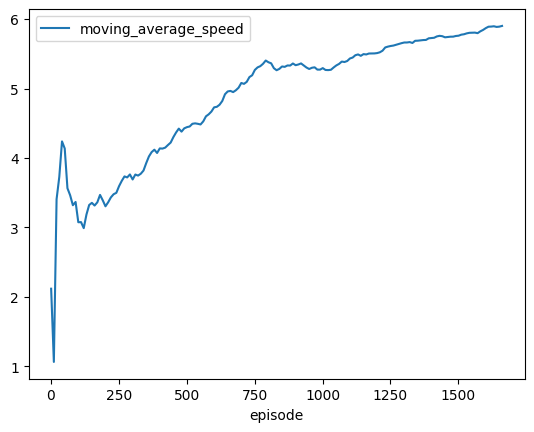

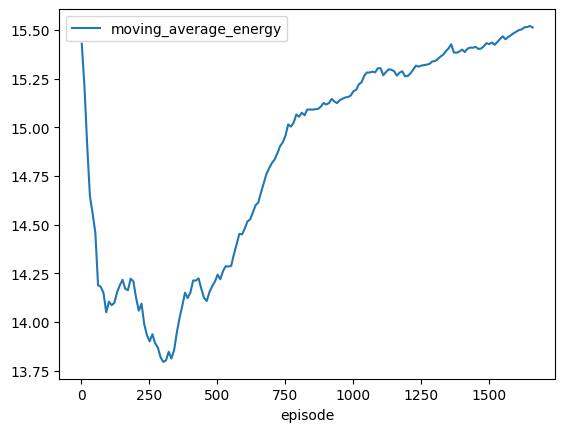

In [22]:
df["moving_average_speed"] = df["speed_reward"].cumsum()/(df["episode"])
df["moving_average_energy"] = df["energy_reward"].cumsum()/(df["episode"])

display(df)
df.iloc[::10].plot.line(x="episode", y="moving_average_speed")
df.iloc[::10].plot.line(x="episode", y="moving_average_energy")